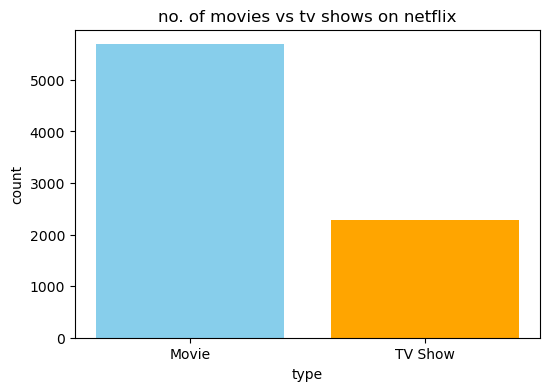

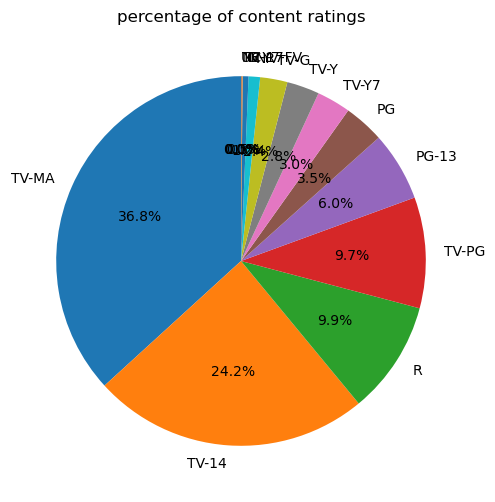

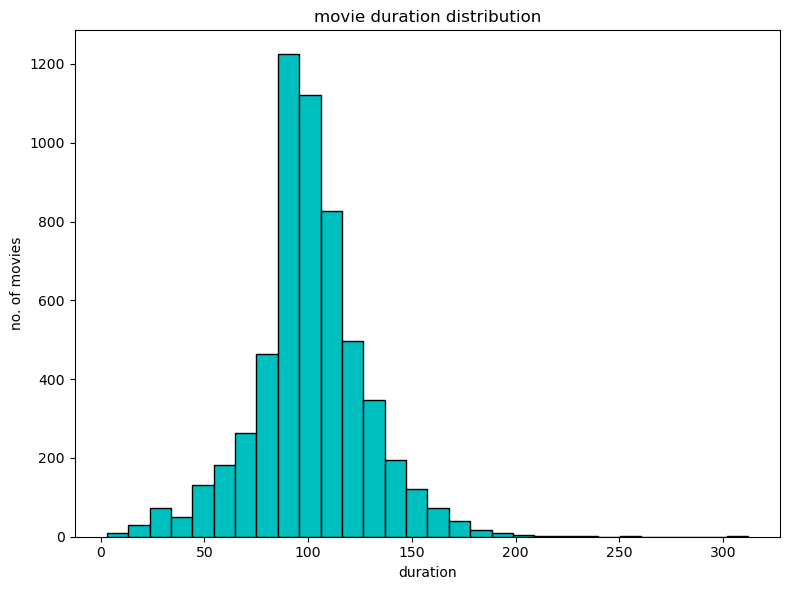

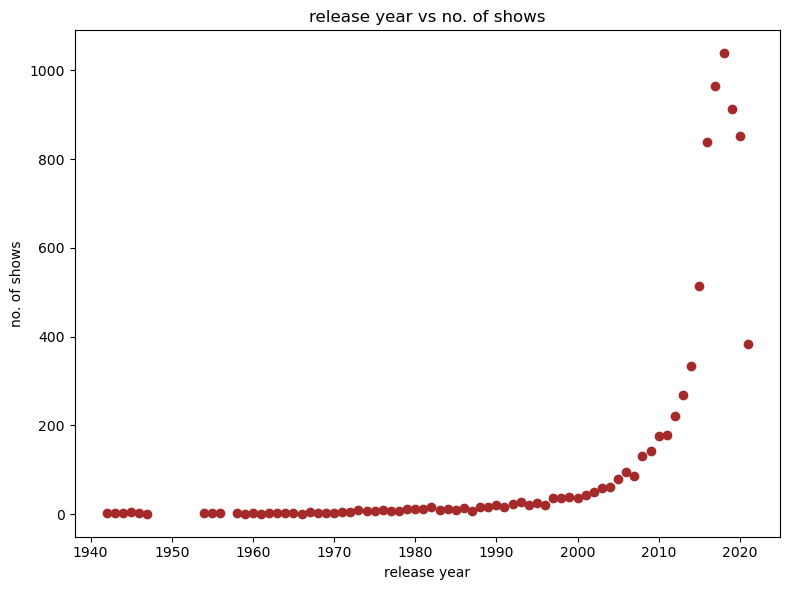

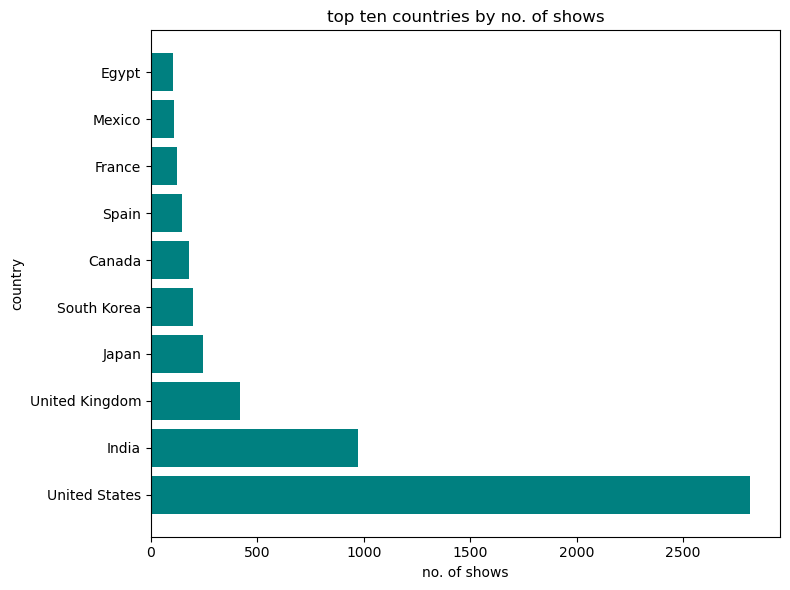

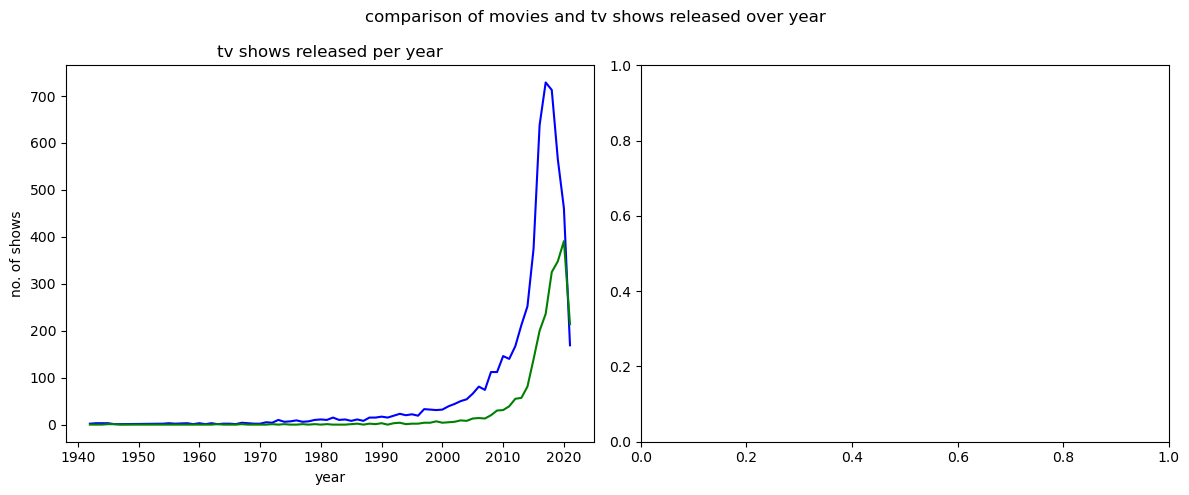

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('netflix_movies (1).csv')
df=df.dropna(subset=['type','release_year','rating','country','duration'])
type_count=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=['skyblue','orange'])
plt.title('no. of movies vs tv shows on netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout
plt.savefig('moviesvstvshows.pdf')
plt.show
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('percentage of content ratings')

plt.tight_layout
plt.savefig('contentratings.pdf')
plt.show   

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='c',edgecolor='black')
plt.title('movie duration distribution')
plt.xlabel('duration')
plt.ylabel('no. of movies')
plt.tight_layout()
plt.savefig('distri.pdf')
plt.show()


release_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_count.index, release_count.values, color='brown')
plt.title('release year vs no. of shows')
plt.xlabel('release year')
plt.ylabel('no. of shows')
plt.tight_layout()
plt.savefig('release.pdf')
plt.show()

country=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country.index,country.values, color='teal')
plt.title('top ten countries by no. of shows')
plt.xlabel('no. of shows')
plt.ylabel('country')

plt.tight_layout()
plt.savefig('country.pdf')
plt.show()

content=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(content.index,content['Movie'],color='blue')
ax[0].set_title('movies released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('no. of movies')

ax[0].plot(content.index,content['TV Show'],color='green')
ax[0].set_title('tv shows released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('no. of shows')

fig.suptitle('comparison of movies and tv shows released over year')
plt.tight_layout()
plt.savefig('camparoison.pdf')
plt.show()